# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [34]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.iloc[:,0:10].head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5


In [35]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

(array([ 4047.,  9632., 14006., 19105., 19732., 18692., 20243., 21503.,
        20566., 19790., 17688., 16651., 16042., 17502., 16807., 15843.,
        14846., 12839.,  8520.,  3457.]),
 array([20.51780822, 22.94794521, 25.37808219, 27.80821918, 30.23835616,
        32.66849315, 35.09863014, 37.52876712, 39.95890411, 42.3890411 ,
        44.81917808, 47.24931507, 49.67945205, 52.10958904, 54.53972603,
        56.96986301, 59.4       , 61.83013699, 64.26027397, 66.69041096,
        69.12054795]),
 <a list of 20 Patch objects>)

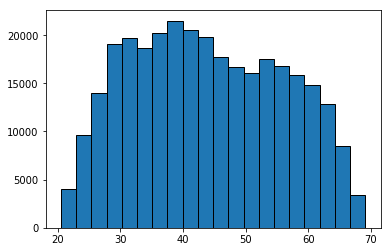

In [42]:
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor= 'k', bins=20)

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [33]:
app_train['AMT_INCOME_TOTAL'].value_counts().index

Float64Index([135000.0, 112500.0, 157500.0, 180000.0,  90000.0, 225000.0,
              202500.0,  67500.0, 270000.0,  81000.0,
              ...
              403650.0, 100944.0,  58950.0, 101083.5, 404406.0, 101119.5,
               79425.0, 101128.5, 202275.0, 262174.5],
             dtype='float64', length=2548)

(array([4.6100e+02, 4.0590e+03, 1.6940e+04, 3.8577e+04, 8.9479e+04,
        6.9588e+04, 6.1249e+04, 1.7899e+04, 6.6250e+03, 1.9880e+03,
        4.0700e+02, 1.5500e+02, 4.8000e+01, 1.8000e+01, 9.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([10.15229885, 10.48931428, 10.8263297 , 11.16334513, 11.50036055,
        11.83737598, 12.1743914 , 12.51140683, 12.84842226, 13.18543768,
        13.52245311, 13.85946853, 14.19648396, 14.53349938, 14.87051481,
        15.20753024, 15.54454566, 15.88156109, 16.21857651, 16.55559194,
        16.89260736, 17.22962279, 17.56663822, 17.90365364, 18.24066907,
        18.57768449]),
 <a list of 25 Patch objects>)

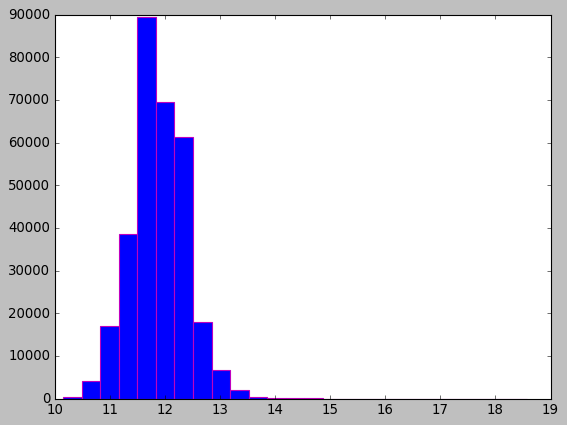

In [52]:
plt.style.use('classic')
plt.hist(np.log(app_train['AMT_INCOME_TOTAL']), edgecolor= 'm', bins=25)

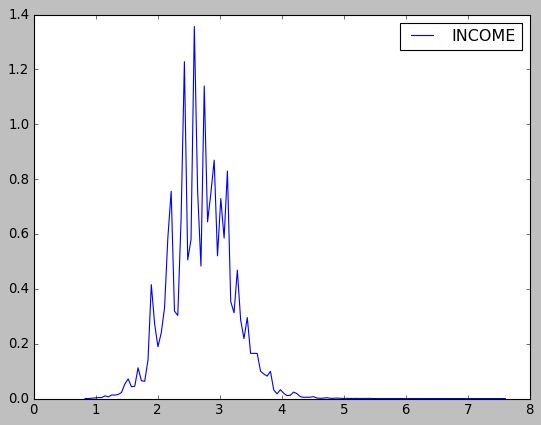

In [75]:
import seaborn as sns
sns.kdeplot(np.log(app_train.loc[app_train['TARGET']==0,'AMT_INCOME_TOTAL']/10000), label= 'INCOME',kernel='gau')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


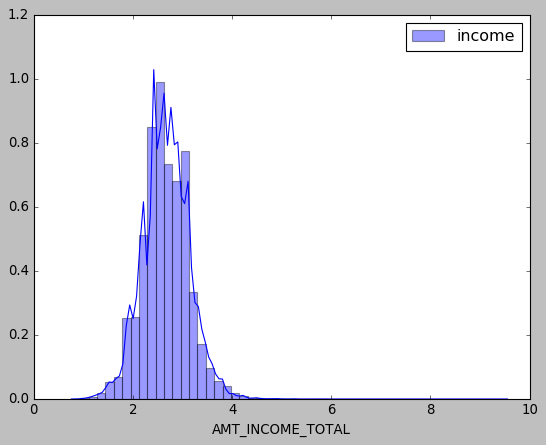

In [84]:
sns.distplot(np.log(app_train.loc[app_train['TARGET']==1, 'AMT_INCOME_TOTAL']/10000),label = 'income')
plt.legend(edgecolor='k')

Text(0,0.5,'AMT_TOTAL INCOME')

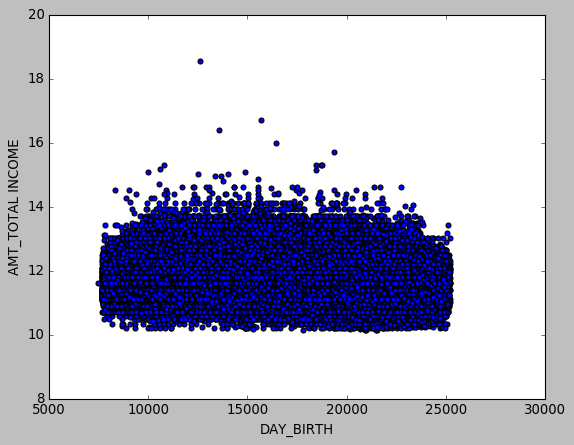

In [61]:
plt.scatter(app_train['DAYS_BIRTH'], np.log(app_train['AMT_INCOME_TOTAL']))
plt.xlabel('DAY_BIRTH');plt.ylabel('AMT_TOTAL INCOME')

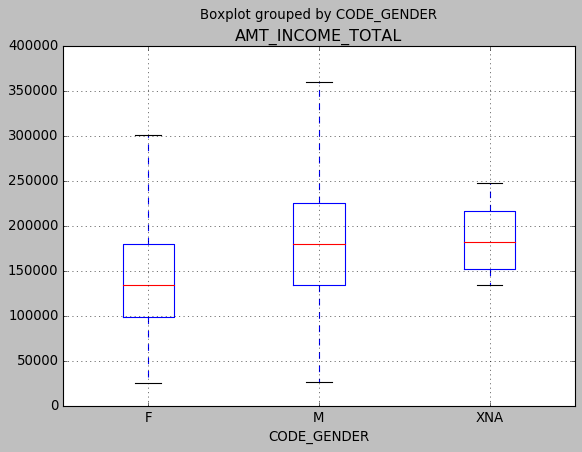

In [66]:
app_train.boxplot(column='AMT_INCOME_TOTAL',by= 'CODE_GENDER', showfliers= False)

In [68]:
app_train.hist(np.log('AMT_INCOME_TOTAL'))

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''